# Data Cleaning

In [53]:
import datetime as dt

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(3792)

In [94]:
kickoff_df = pd.read_csv('../data/kickoff_plays.csv')
punt_df = pd.read_csv('../data/punt_plays.csv')

In [95]:
kickoff_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN


In [96]:
punt_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
1,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


## Kickoff Data Cleaning

In [97]:
kick_na_val_df = pd.DataFrame(zip(kickoff_df.columns, list(kickoff_df.isnull().sum())), columns=['Column', 'Null values'])
kick_na_val_df[kick_na_val_df['Null values'] == 7843]

,Column,Null values
11,kickBlockerId,7843
20,passResult,7843
25,snapDetail,7843
26,snapTime,7843
27,operationTime,7843
38,gunners,7843
39,puntRushers,7843
41,vises,7843
42,kickContactType,7843


In [98]:
kickoff_df.drop(columns=['kickBlockerId', 'passResult', 'snapDetail', 'snapTime', 'operationTime', 'gunners', 
                         'puntRushers', 'vises', 'kickContactType'], inplace=True)
kickoff_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,specialTeamsSafeties
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,66.0,NaN,40,45,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,PHI 23; PHI 27
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,ATL,35,05:01:00,NaN,NaN,NaN,0,3,64.0,30.0,34,75,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,ATL 17; ATL 22


In [99]:
kickoff_df.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                      0
returnerId                 4985
yardlineSide                 57
yardlineNumber                0
gameClock                     0
penaltyCodes               7487
penaltyJerseyNumbers       7487
penaltyYards               7487
preSnapHomeScore              0
preSnapVisitorScore           0
kickLength                    0
kickReturnYardage          4874
playResult                    0
absoluteYardlineNumber        0
hangTime                    620
kickType                      0
kickDirectionIntended         9
kickDirectionActual           9
returnDirectionIntended    5022
returnDirectionActual      5019
missedTackler              7229
assistTackler              7234
tackler 

In [100]:
#Only interested in the kicks in which the receiving team returned kick
kickoff_df = kickoff_df[kickoff_df['specialTeamsResult'] == 'Return']
kickoff_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,specialTeamsSafeties
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,ATL,35,05:01:00,NaN,NaN,NaN,0,3,64.0,30.0,34,75,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,ATL 17; ATL 22
3,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,44979,ATL,35,02:08:00,OH,PHI 29,5.0,3,6,68.0,13.0,60,45,3.63,D,C,C,C,R,NaN,NaN,ATL 36,8-0-2,ATL 14; ATL 17


In [101]:
kickoff_df.isna().sum().sort_values(ascending = False)[:15]

penaltyYards               2613
penaltyJerseyNumbers       2613
penaltyCodes               2613
assistTackler              2321
missedTackler              2320
hangTime                    364
tackler                     287
returnDirectionIntended     147
returnDirectionActual       145
returnerId                  127
yardlineSide                 31
specialTeamsSafeties         30
kickReturnYardage             6
kickDirectionIntended         2
kickDirectionActual           2
dtype: int64

In [102]:
kickoff_df.shape

(2921, 34)

In [103]:
kickoff_df[['penaltyYards', 'penaltyJerseyNumbers', 'penaltyCodes']]

,penaltyYards,penaltyJerseyNumbers,penaltyCodes
1,NaN,NaN,NaN
3,5.0,PHI 29,OH
8,0.0,BAL 37;BUF 30,UNR;FMM
9,NaN,NaN,NaN
12,NaN,NaN,NaN
...,...,...,...
7827,NaN,NaN,NaN
7828,NaN,NaN,NaN
7835,NaN,NaN,NaN
7839,NaN,NaN,NaN


In [115]:
kickoff_df['returnerId']

1       44979
3       44979
8       46532
9       42573
12      42573
        ...  
7827    43697
7828    52653
7835    48322
7839    48322
7842      NaN
Name: returnerId, Length: 2921, dtype: object

In [116]:
player_df = pd.read_csv('../data/players.csv')
player_df.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [117]:
player_df['Position'].value_counts()

WR     325
CB     303
DE     208
OLB    200
TE     190
T      188
RB     181
G      171
DT     166
ILB    117
FS     117
SS     103
C       87
K       57
P       51
NT      50
LS      47
DB      42
LB      42
MLB     38
FB      27
OT       9
QB       8
OG       2
S        2
HB       1
Name: Position, dtype: int64

In [119]:
#Can get further measurables on returners and others on kick and covarage unit by using the Player DF
# Will look at this more later, need to build a model first
player_df[player_df['nflId'] == 44979]

,nflId,height,weight,birthDate,collegeName,Position,displayName
2501,44979,5-11,191,1995-03-20,West Virginia,WR,Shelton Gibson


In [104]:
kickoff_df[['penaltyCodes']].value_counts()

penaltyCodes
OH              139
IBW              46
IDT              23
UNR              23
OFK              14
FMM              11
ILF              11
UNRd              8
IBB               4
UOHd              3
IDT;OH            3
WED               2
UNR;OH            2
IBW;OH            2
OH;OH             2
UNS               1
UNRd;ILF          1
UNRd;UNR          1
UNSd              1
UNR;FMM           1
DSQd              1
TRPd              1
OH;UNRd           1
OH;UNR            1
LBL               1
ITK               1
ILHd              1
IBW;ITK           1
HC                1
OH;IBW            1
dtype: int64

In [105]:
#Changing all NaN values to NP or No Penalty to represent a play that did not involve a penalty
kickoff_df['penaltyCodes'] = kickoff_df.penaltyCodes.map(lambda penaltyCodes: 'NP' if penaltyCodes is np.nan else penaltyCodes)
kickoff_df[['penaltyCodes']].head()

,penaltyCodes
1,NP
3,OH
8,UNR;FMM
9,NP
12,NP


In [113]:
kickoff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 1 to 7842
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   2921 non-null   int64  
 1   playId                   2921 non-null   int64  
 2   playDescription          2921 non-null   object 
 3   quarter                  2921 non-null   int64  
 4   down                     2921 non-null   int64  
 5   yardsToGo                2921 non-null   int64  
 6   possessionTeam           2921 non-null   object 
 7   specialTeamsPlayType     2921 non-null   object 
 8   specialTeamsResult       2921 non-null   object 
 9   kickerId                 2921 non-null   float64
 10  returnerId               2794 non-null   object 
 11  yardlineSide             2890 non-null   object 
 12  yardlineNumber           2921 non-null   int64  
 13  gameClock                2921 non-null   object 
 14  penaltyCodes            

TypeError: 'NoneType' object is not iterable

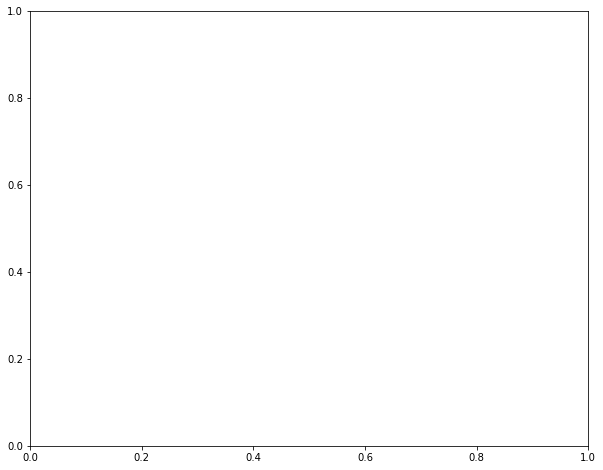

In [114]:
plt.figure(figsize=(10,8))
sns.histplot(kickoff_df[['penaltyCodes']])
;

## Punt Data Cleaning

In [57]:
punt_df.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                     74
returnerId                 1913
kickBlockerId              5952
yardlineSide                109
yardlineNumber                0
gameClock                     0
penaltyCodes               5350
penaltyJerseyNumbers       5350
penaltyYards               5350
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                 5960
kickLength                  113
kickReturnYardage          3636
playResult                    0
absoluteYardlineNumber        0
snapDetail                   74
snapTime                     75
operationTime                75
hangTime                    118
kickType                    113
kickDirectionIntended       126
kickDire

In [63]:
punt_df['specialTeamsResult'].value_counts()

Return                      2286
Fair Catch                  1640
Downed                       829
Out of Bounds                586
Touchback                    383
Muffed                       154
Non-Special Teams Result      74
Blocked Punt                  39
Name: specialTeamsResult, dtype: int64

In [66]:
punt_df = punt_df[punt_df['specialTeamsResult'] == 'Return']
punt_df.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
4,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,8,ATL,Punt,Return,37267.0,29957,NaN,ATL,26,00:44:00,UNR,PHI 50,12.0,3,6,NaN,57.0,8.0,61,36,OK,0.76,2.12,4.62,N,C,C,C,C,ATL 83,NaN,ATL 34,NaN,ATL 83; ATL 28,NaN,NaN,PHI 29; PHI 37; PHI 32,CC


In [67]:
punt_df.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                      0
returnerId                    1
kickBlockerId              2286
yardlineSide                 12
yardlineNumber                0
gameClock                     0
penaltyCodes               1881
penaltyJerseyNumbers       1881
penaltyYards               1881
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                 2286
kickLength                    0
kickReturnYardage             8
playResult                    0
absoluteYardlineNumber        0
snapDetail                    0
snapTime                      0
operationTime                 0
hangTime                      1
kickType                      0
kickDirectionIntended         2
kickDire